Домашняя работа 1

Установка зависимостей

In [14]:
%pip install matplotlib
%pip install sympy
%pip install numpy
%pip install pywavelets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
num = 7     # номер по журналу
gr = 4      # индекс кафердры

t = sp.Symbol('t')

Задание 1. (ряды Фурье)

In [17]:
f = gr * pow(t - num, 2)
t_range = (0, 2 * num)

Используя пакет SymPy, найдите разложение функции в ряд Фурье в символьном виде,
упростите разложение.

In [18]:
fourier = sp.fourier_series(f, (t, *t_range))
fourier

FourierSeries(4*(t - 7)**2, (t, 0, 14), (196/3, SeqFormula(Piecewise((1372*sin(2*_n*pi)/(_n*pi) + 2744*cos(2*_n*pi)/(_n**2*pi**2) + 2744/(_n**2*pi**2) - 2744*sin(2*_n*pi)/(_n**3*pi**3), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (2744/3, True))*cos(_n*pi*t/7)/7, (_n, 1, oo)), SeqFormula(Piecewise((-1372*cos(2*_n*pi)/(_n*pi) + 1372/(_n*pi) + 2744*sin(2*_n*pi)/(_n**2*pi**2) + 2744*cos(2*_n*pi)/(_n**3*pi**3) - 2744/(_n**3*pi**3), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*pi*t/7)/7, (_n, 1, oo))))

In [19]:
sp.simplify(fourier).truncate(5)

784*cos(pi*t/7)/pi**2 + 196*cos(2*pi*t/7)/pi**2 + 784*cos(3*pi*t/7)/(9*pi**2) + 49*cos(4*pi*t/7)/pi**2 + 196/3

Постройте графики функции и частичных сумм (f(t), S_0(t)); (f(t), S_1(t)); (f(t), S_2(t)); (f(t), S_{10}(t))

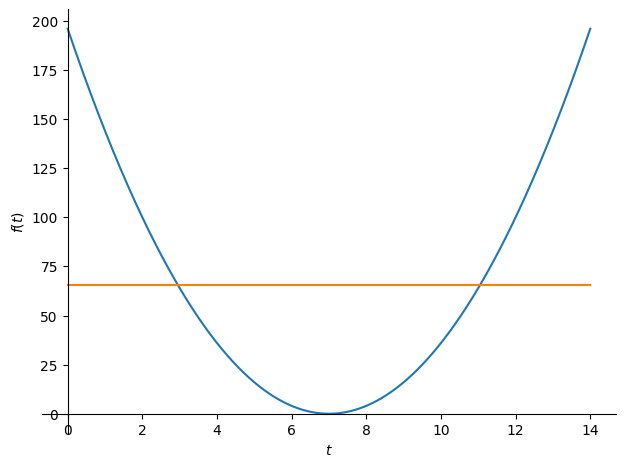

In [20]:
sp.plot(f, fourier.truncate(1), (t, *t_range))

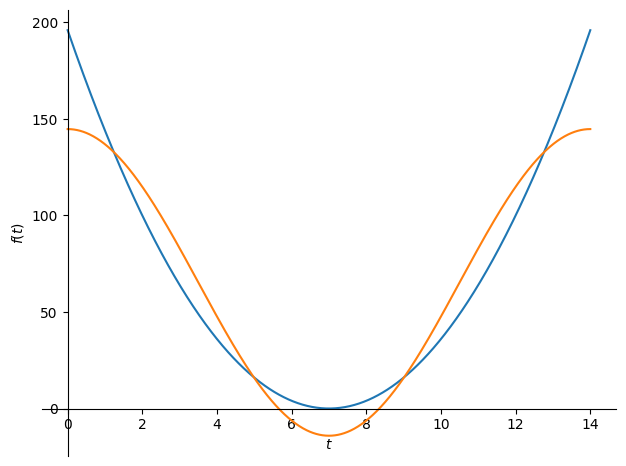

In [21]:
sp.plot(f, fourier.truncate(2), (t, *t_range))

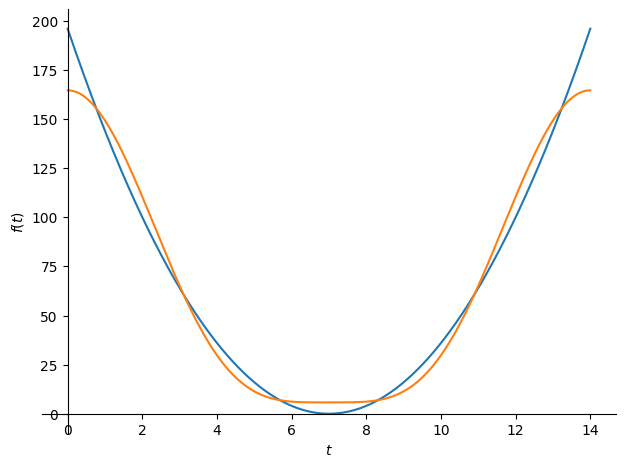

In [22]:
sp.plot(f, fourier.truncate(3), (t, *t_range))

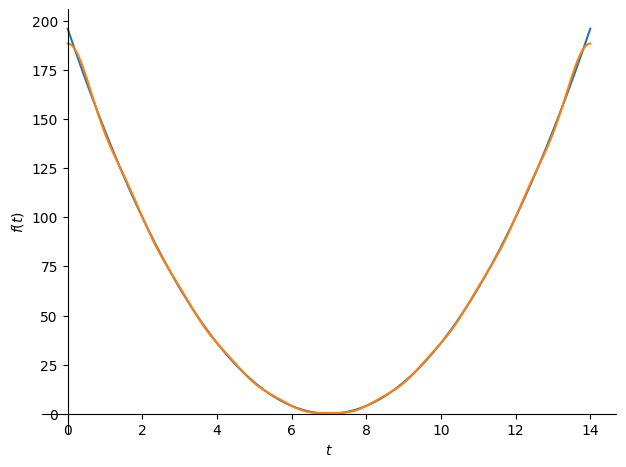

In [23]:
sp.plot(f, fourier.truncate(11), (t, *t_range))

Найдите максимальную погрешность приближения функции f(t) частичной суммой S_{50}(t).

In [24]:
lambdified = sp.lambdify(t, sp.Abs(f - fourier.truncate(50)).evalf())
np.max(lambdified(np.arange(*t_range, 1e-3)))


np.float64(1.6047092270468823)

Задание 2. (преобразование Фурье)

In [25]:
num_points = 256
t_range = (0, 2 * np.pi)

In [26]:
s = t * pow(num + t, 0.5)
p = sp.Piecewise(
    (sp.cos(2 * (gr * t + num)), t <= sp.pi),
    (sp.cos(gr * t + num), t > sp.pi),
)
n = sp.Piecewise(
    (-8, sp.Eq(t, sp.pi / 2)),
    (0, t != sp.pi / 2)
)

f = s + p + n
f

t*(t + 7)**0.5 + Piecewise((-8, Eq(t, pi/2)), (0, True)) + Piecewise((cos(8*t + 14), t <= pi), (cos(4*t + 7), True))

In [27]:
t_values = np.linspace(*t_range, num_points)
r_values = np.random.uniform(-0.5, 0.5, num_points)

f_num = sp.lambdify(t, f, 'numpy')
f_values = f_num(t_values) + r_values

Text(0, 0.5, 'f(t)')

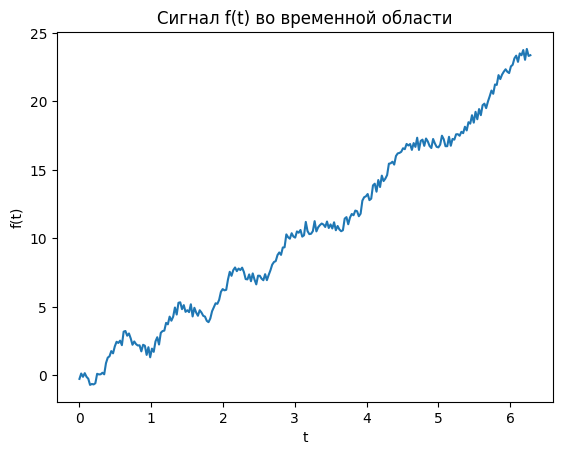

In [28]:
fourier = np.fft.fft(f_values, num_points)
plt.plot(t_values, f_values)
plt.title("Сигнал f(t) во временной области")
plt.xlabel("t")
plt.ylabel("f(t)")

Постройте график амплитудного спектра

Text(0, 0.5, 'Амплитуда')

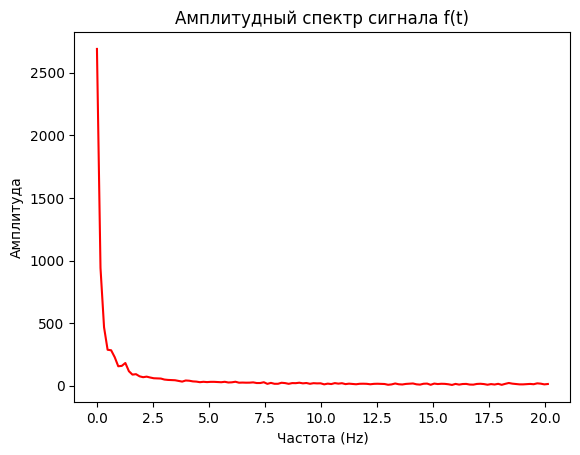

In [29]:
frequencies = np.fft.fftfreq(num_points, (t_values[1] - t_values[0]))
plt.plot(frequencies[:num_points // 2], np.abs(fourier)[:num_points // 2], color='r')
plt.title("Амплитудный спектр сигнала f(t)")
plt.xlabel("Частота (Hz)")
plt.ylabel("Амплитуда")

Оставьте 10% наибольших по абсолютной величине коэффициентов и обнулите
остальные

In [30]:
sorted_indices = np.argsort(np.abs(fourier))
num_to_keep = int(0.1 * num_points)
threshold_indices = sorted_indices[-num_to_keep:]

fourier_filtered = np.zeros_like(fourier)
fourier_filtered[threshold_indices] = fourier[threshold_indices]

Используя обратное преобразование Фурье, восстановите сигнал по оставшимся
коэффициентам

In [31]:
f_values_filtered = np.fft.ifft(fourier_filtered).real

Найдите разницу между исходным (без учета случайной составляющей) и
восстановленным сигналами, используя L1-норму

In [32]:
f_no_noise = f_num(t_values)
difference = f_no_noise - f_values_filtered
L1_norm = np.sum(np.abs(difference))
L1_norm

np.float64(164.88609594335355)

Постройте графики исходного (без учета случайной составляющей) и
восстановленного сигналов

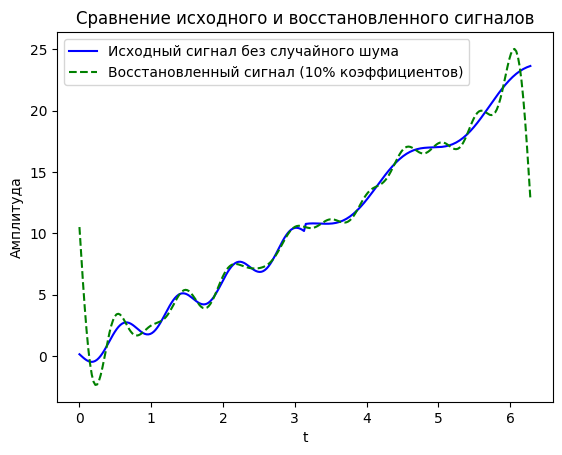

In [33]:
plt.plot(t_values, f_no_noise, label="Исходный сигнал без случайного шума", color='b')
plt.plot(t_values, f_values_filtered, label="Восстановленный сигнал (10% коэффициентов)", color='g', linestyle='--')
plt.title("Сравнение исходного и восстановленного сигналов")
plt.xlabel("t")
plt.ylabel("Амплитуда")
plt.legend()

Задание 3 (сжатие сигнала)

In [34]:
import pywt

In [35]:
num_points = 256
t_range = (0, 2 * np.pi)

s = t * pow(num + t, 0.5)
p = sp.Piecewise(
    (2 * sp.cos(2 * (gr * t + num)), t <= sp.pi),
    (3 * sp.cos(gr * t + num), t > sp.pi),
)
n = sp.Piecewise(
    (-8, sp.Eq(t, sp.pi / 2)),
    (0, t != sp.pi / 2)
)

f = s + p + n
f

t*(t + 7)**0.5 + Piecewise((-8, Eq(t, pi/2)), (0, True)) + Piecewise((2*cos(8*t + 14), t <= pi), (3*cos(4*t + 7), True))

In [36]:
t_values = np.linspace(*t_range, num_points)
r_values = np.random.uniform(-0.5, 0.5, num_points)

f_num = sp.lambdify(t, f, 'numpy')
f_values = f_num(t_values) + r_values

Функции

In [37]:
def plot_result(t_values, f_no_noise, f_restored):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t_values, f_no_noise, label="Исходный сигнал без случайного шума", color='b')
    plt.title("Исходный сигнал")
    plt.xlabel("t")
    plt.ylabel("Амплитуда")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title("Восстановленный сигнал")
    plt.plot(t_values, f_restored, label="Восстановленный сигнал (10% коэффициентов)", color='g')
    plt.xlabel("t")
    plt.ylabel("Амплитуда")
    plt.legend()

    plt.tight_layout()
    plt.show()


def denoise(f_values: np.array, wavelet_type: str):
    coeffs = pywt.wavedec(f_values, wavelet_type)

    coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    threshold = np.percentile(np.abs(coeff_arr), 90)
    coeff_arr[np.abs(coeff_arr) < threshold] = 0
    coeffs_thresholded = pywt.array_to_coeffs(coeff_arr, coeff_slices, output_format='wavedec')

    return pywt.waverec(coeffs_thresholded, wavelet_type)

Вейвлет-преобразование Добеши 2

In [38]:
f_restored = denoise(f_values, 'db2')


In [39]:
l1_norm = np.sum(np.abs(f_values - f_restored))
print("L1-норма разности:", l1_norm)

L1-норма разности: 96.58530213957704


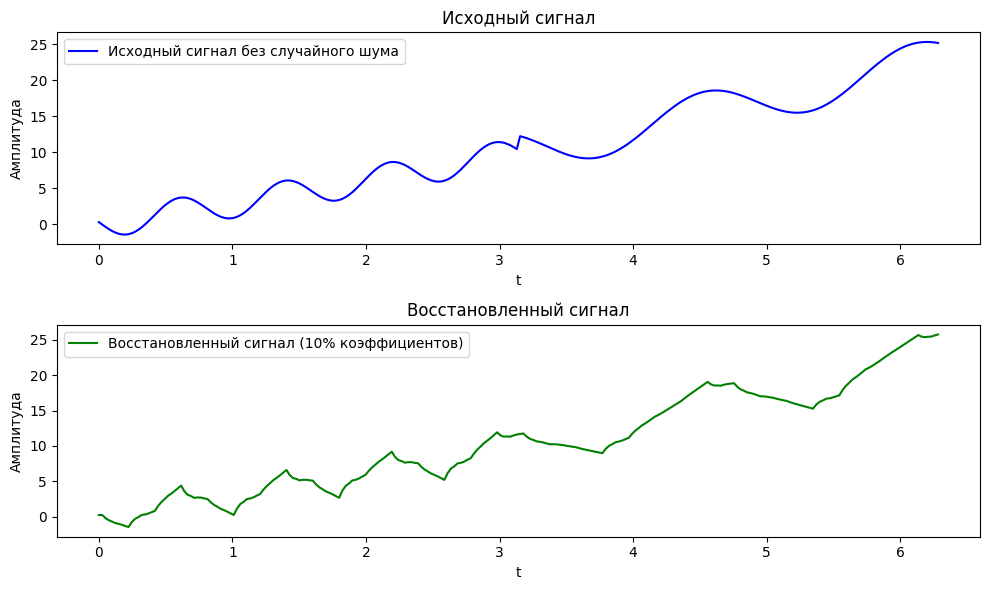

In [40]:
f_no_noise = f_num(t_values)
plot_result(t_values, f_no_noise, f_restored)

Вейвлет-преобразование Добеши 10

In [41]:
f_restored = denoise(f_values, 'db10')


In [42]:
l1_norm = np.sum(np.abs(f_values[:len(f_restored)] - f_restored))
print("L1-норма разности:", l1_norm)

L1-норма разности: 79.28223743008775


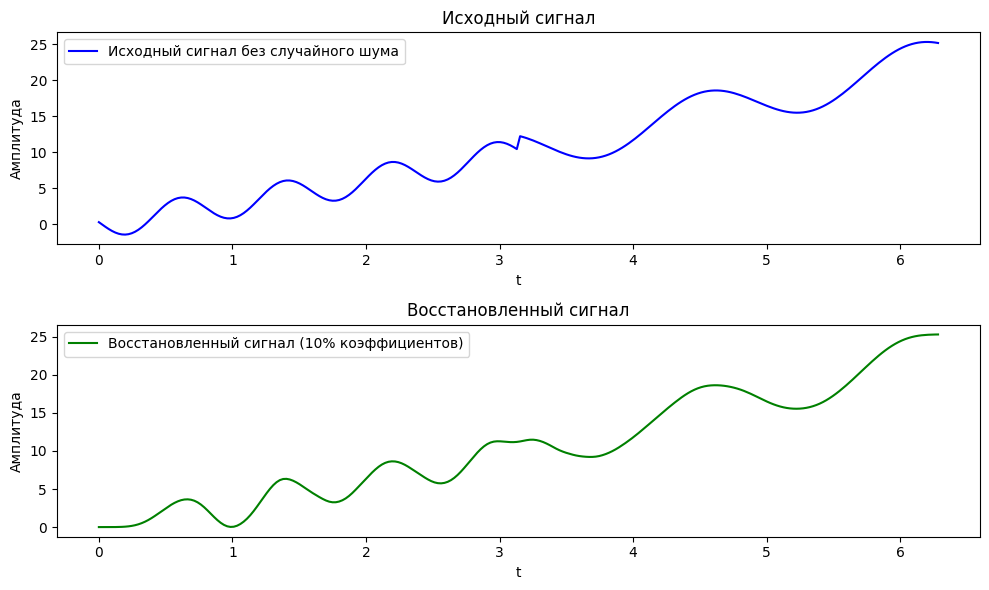

In [43]:
f_no_noise = f_num(t_values)
plot_result(t_values, f_no_noise, f_restored)

Вейвлет-преобразование биортогонального вейвлета 2,2

In [44]:
f_restored = denoise(f_values, 'bior2.2')


In [45]:
l1_norm = np.sum(np.abs(f_values[:len(f_restored)] - f_restored))
print("L1-норма разности:", l1_norm)

L1-норма разности: 72.52089671791236


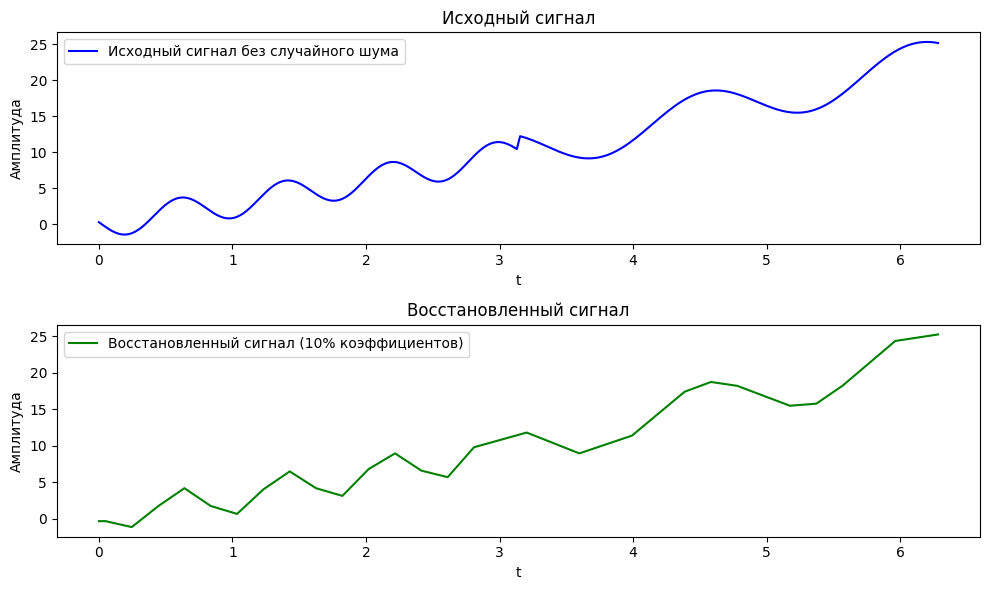

In [46]:
f_no_noise = f_num(t_values)
plot_result(t_values, f_no_noise, f_restored)

Вейвлет-преобразование симметричного вейвлета 4

In [47]:
f_restored = denoise(f_values, 'sym4')


In [48]:
l1_norm = np.sum(np.abs(f_values[:len(f_restored)] - f_restored))
print("L1-норма разности:", l1_norm)

L1-норма разности: 73.43375796954533


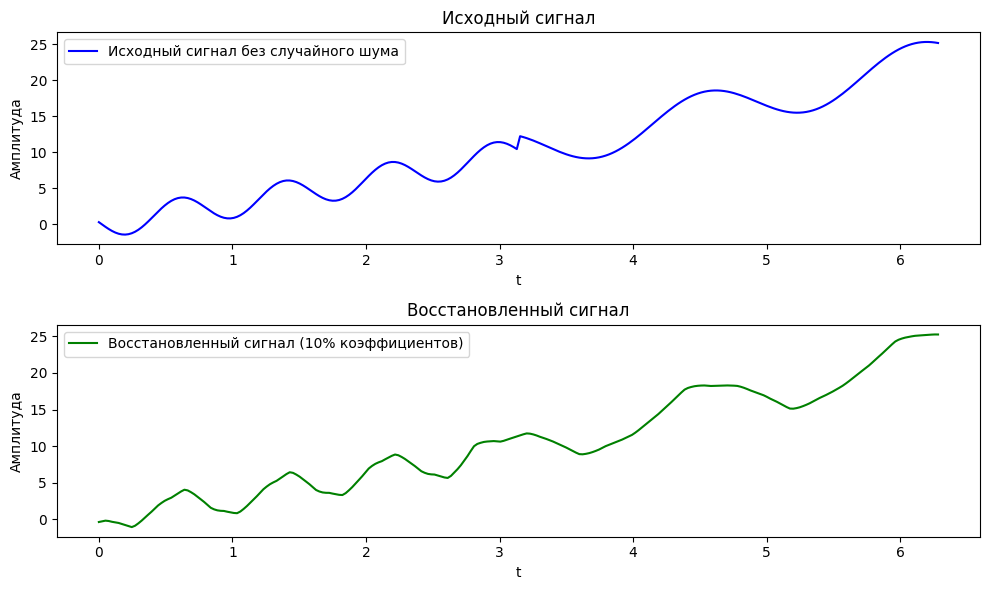

In [49]:
f_no_noise = f_num(t_values)
plot_result(t_values, f_no_noise, f_restored)

Задание 4 (устранение шума в сигнале)

In [50]:
num_points = 256
t_range = (0, 2 * np.pi)

s = t * pow(num + t, 0.5)
p = sp.Piecewise(
    (2 * sp.cos(2 * (gr * t + num)), t <= sp.pi),
    (3 * sp.cos(gr * t + num), t > sp.pi),
)

f = s + p
f

t*(t + 7)**0.5 + Piecewise((2*cos(8*t + 14), t <= pi), (3*cos(4*t + 7), True))

In [51]:
t_values = np.linspace(*t_range, num_points)
np.random.seed(1)
r_values = np.random.normal(0, 4, size=t_values.shape)

f_num = sp.lambdify(t, f, 'numpy')
f_values = f_num(t_values) + r_values

In [52]:
def calculate_snr(signal: np.array, noise):
    power_signal = np.mean(signal ** 2)
    power_noise = np.mean(noise ** 2)
    snr = 10 * np.log10(power_signal / power_noise)
    return snr

C:\Users\nikit\AppData\Local\Temp\ipykernel_29524\3319520034.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\nikit\AppData\Local\Temp\ipykernel_29524\3319520034.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


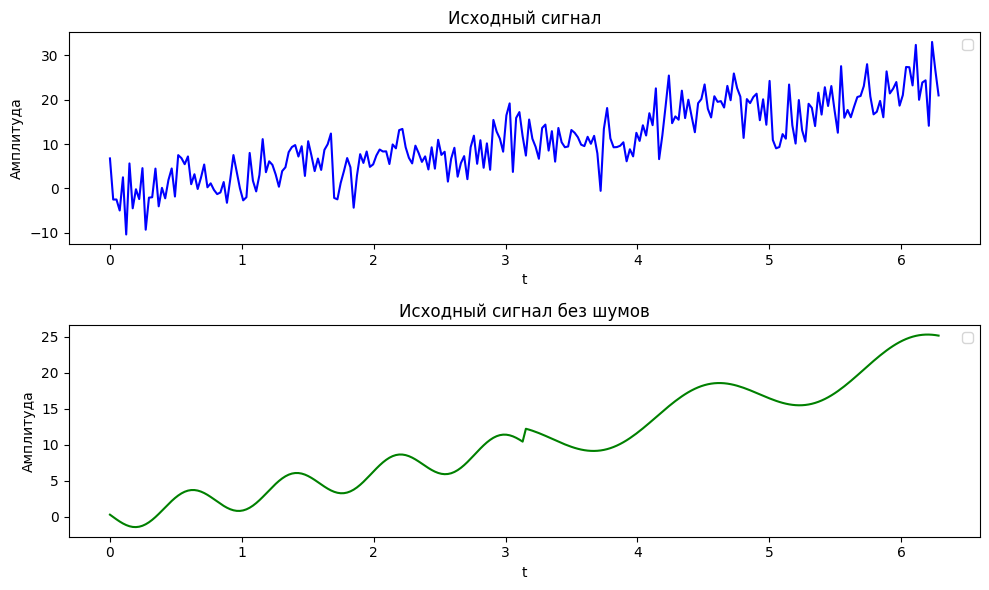

In [63]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_values, f_values, color='b')
plt.title("Исходный сигнал")
plt.xlabel("t")
plt.ylabel("Амплитуда")
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Исходный сигнал без шумов")
plt.plot(t_values, f_no_noise, color='g')
plt.xlabel("t")
plt.ylabel("Амплитуда")
plt.legend()

plt.tight_layout()
plt.show()

Добеши 2

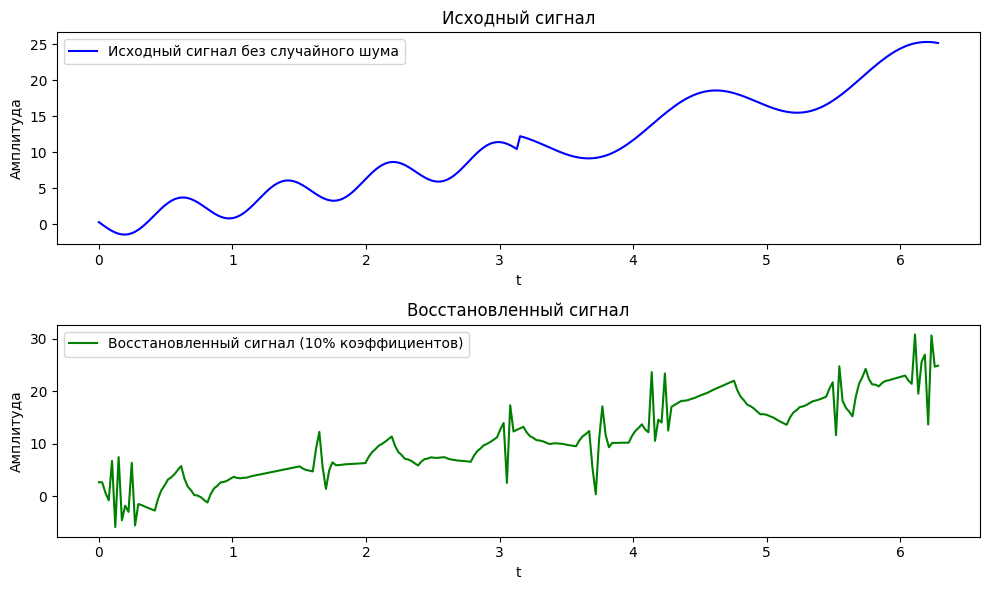

In [54]:
f_no_noise = f_num(t_values)
f_restored = denoise(f_values, 'db2')
plot_result(t_values, f_no_noise, f_restored)

In [55]:
calculate_snr(f_values, r_values)

np.float64(10.809635880458035)

In [56]:
calculate_snr(f_restored, f_no_noise - f_restored)

np.float64(14.073055816432916)

Добеши 10

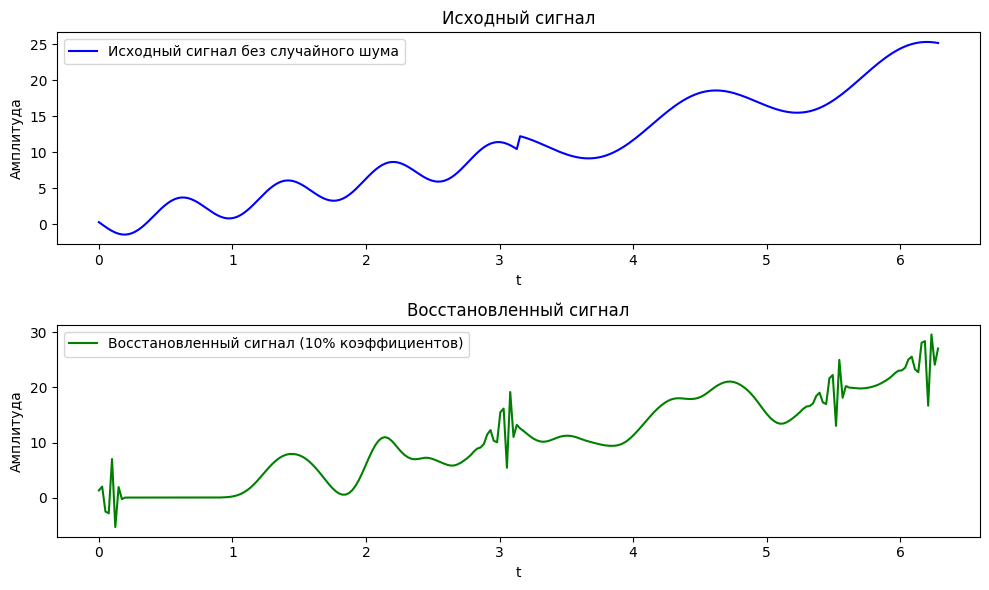

In [57]:
f_no_noise = f_num(t_values)
f_restored = denoise(f_values, 'db10')
plot_result(t_values, f_no_noise, f_restored)

In [58]:
calculate_snr(f_restored, f_no_noise - f_restored)

np.float64(16.152874218066692)

Биортогональный вейвлет 2,2

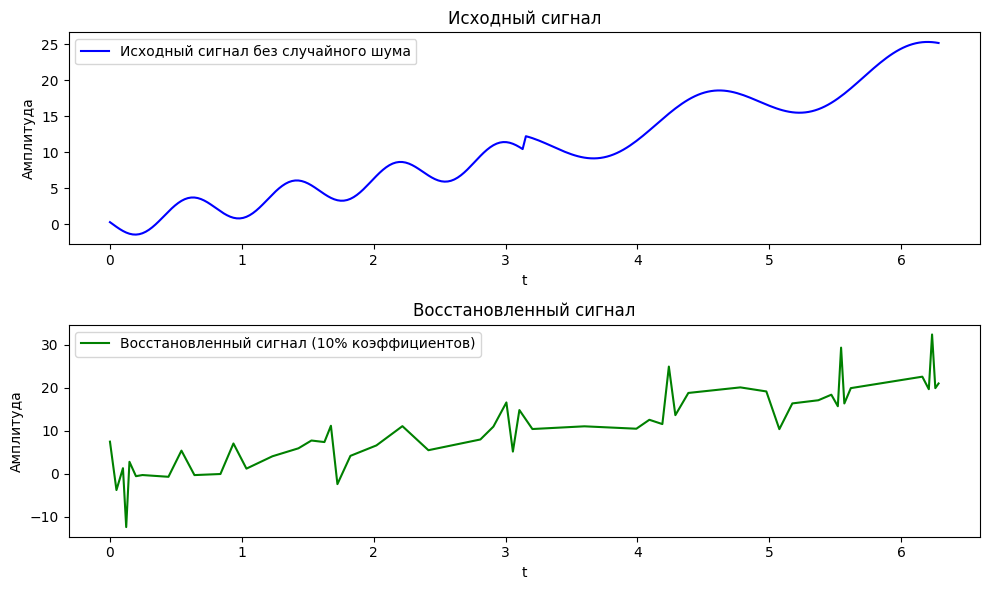

In [59]:
f_no_noise = f_num(t_values)
f_restored = denoise(f_values, 'bior2.2')
plot_result(t_values, f_no_noise, f_restored)

In [60]:
calculate_snr(f_restored, f_no_noise - f_restored)

np.float64(14.570048257135104)

Симметричный вейвлет 4

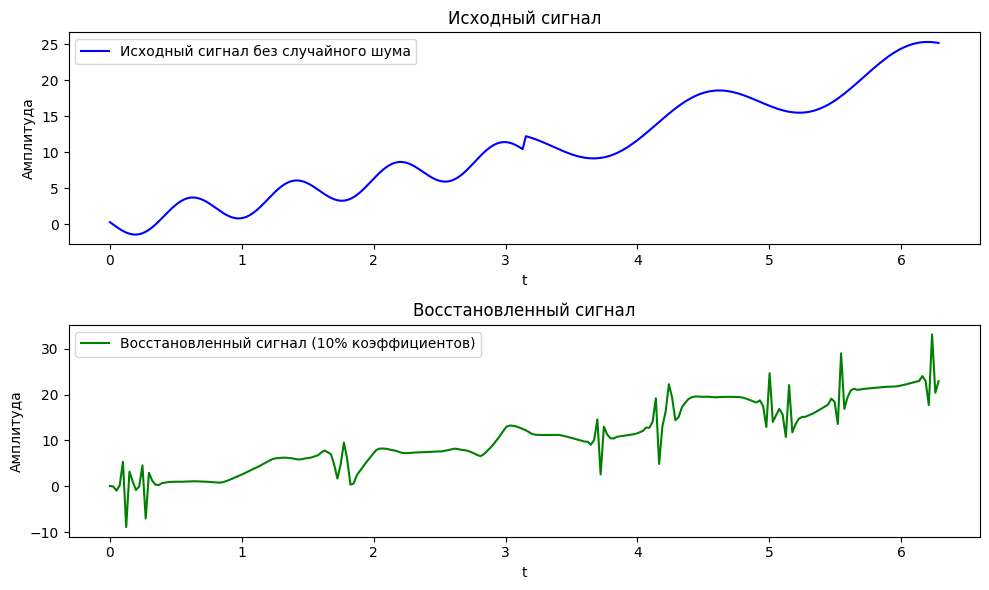

In [61]:
f_no_noise = f_num(t_values)
f_restored = denoise(f_values, 'sym4')
plot_result(t_values, f_no_noise, f_restored)

In [62]:
calculate_snr(f_restored, f_no_noise - f_restored)

np.float64(14.737411907816341)